In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

raw_data = load_boston()
print(raw_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
df["PRICE"] = raw_data.target
display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Binning & Smooting

Data içinde bulunan "DIS" değişkeninde Evin Bostondaki iş merkezlerine uzaklığı ağırlıklı olarak hesaplanmış. Bu değişkeni farklı yöntemler kullanarak Ayrıklaştırmak istiyoruz.  

[]

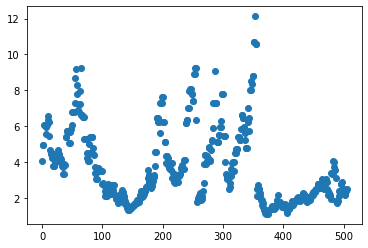

In [4]:
# Bu scatterplotı Ayrıklaştırma işlemi yapıldıktan sonraki hali ile karşılaştırabilirsiniz
DIS = df.DIS
x = np.arange(len(DIS))
plt.scatter(x, DIS)
plt.plot()

### Soru

0    365
1    125
2     16
Name: DIS, dtype: int64


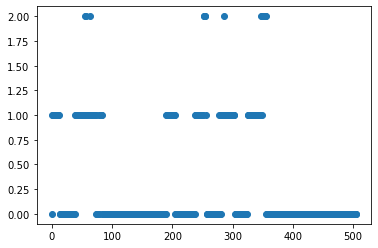

In [5]:
new_DIS, bins = pd.cut(df.DIS,bins=3,retbins=True,labels=[0,1,2])
print(new_DIS.value_counts())
plt.scatter(x, new_DIS)

<b>pd.cut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
-- Equal-frequency(Eşit frekans)<br>
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [6]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("p.cut fonksiyonu değişkeni ayrıştırırken 'eşit aralık' stratejisini kullandı.")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [ 1.1186031   4.79523333  8.46086667 12.1265    ]

 Ayrık değerlerin görülme sayısı
0    365
1    125
2     16
Name: DIS, dtype: int64 


p.cut fonksiyonu değişkeni ayrıştırırken 'eşit aralık' stratejisini kullandı.


### Soru 

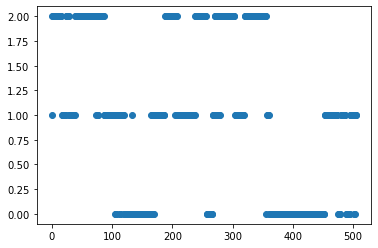

In [7]:
new_DIS, bins = pd.qcut(df.DIS,q=3,retbins=True,labels=[0,1,2])
x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS)

<b>pd.qcut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
-- Equal-frequency(Eşit frekans)<br>
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [8]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("p.qcut fonksiyonu değişkeni ayrıştırıken 'eşit frekans' stratejisini kullandı.")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [ 1.1296      2.38403333  4.3257     12.1265    ]

 Ayrık değerlerin görülme sayısı
2    169
0    169
1    168
Name: DIS, dtype: int64 


p.qcut fonksiyonu değişkeni ayrıştırıken 'eşit frekans' stratejisini kullandı.


# Feature Generation

Bu bölümde var olan değişkenlerden yeni değişkenler üretelim.

In [9]:
df[['AGE','DIS']]
# yaşı büyük olan merkeze daha yakındır varsayımı ile değişken türetildi

,AGE,DIS
0,65.2,4.0900
1,78.9,4.9671
2,61.1,4.9671
3,45.8,6.0622
4,54.2,6.0622
...,...,...
501,69.1,2.4786
502,76.7,2.2875
503,91.0,2.1675
504,89.3,2.3889


In [10]:
# seçtiğiniz iki değişkenin toplamından yeni bir değişken üretin
df["AGE_DIS_ADD"]=df.AGE+df.DIS
display(df["AGE_DIS_ADD"])

0      69.2900
1      83.8671
2      66.0671
3      51.8622
4      60.2622
        ...   
501    71.5786
502    78.9875
503    93.1675
504    91.6889
505    83.3050
Name: AGE_DIS_ADD, Length: 506, dtype: float64

In [11]:
# seçtiğiniz iki değişkenin farkından yeni bir değişken üretin
df["AGE_DIS_SUB"]=df.AGE-df.DIS
display(df["AGE_DIS_SUB"])

0      61.1100
1      73.9329
2      56.1329
3      39.7378
4      48.1378
        ...   
501    66.6214
502    74.4125
503    88.8325
504    86.9111
505    78.2950
Name: AGE_DIS_SUB, Length: 506, dtype: float64

In [12]:
# seçtiğiniz iki değişkenin bölümünden yeni bir değişken üretin
df["AGE_DIS_DIV"]=df.AGE/df.DIS
display(df["AGE_DIS_DIV"])

0      15.941320
1      15.884520
2      12.300940
3       7.555013
4       8.940649
         ...    
501    27.878641
502    33.530055
503    41.983852
504    37.381221
505    32.255489
Name: AGE_DIS_DIV, Length: 506, dtype: float64

In [13]:
# seçtiğiniz iki değişkenin çarpımından yeni bir değişken üretin
df["AGE_DIS_MUL"]=df.AGE*df.DIS
display(df["AGE_DIS_MUL"])

0      266.66800
1      391.90419
2      303.48981
3      277.64876
4      328.57124
         ...    
501    171.27126
502    175.45125
503    197.24250
504    213.32877
505    202.40400
Name: AGE_DIS_MUL, Length: 506, dtype: float64

sklearn kütüphanesindeki PolynomialFeatures'ı kullanarak yeni featurelar üretin (NOT:Hedef değişkeni(PRICE) yeni featureları üretirken kullanmayın.)

In [14]:
# PolynomialFeatures kullandığınız python kodunu buraya yazabilirsiniz.
# dataframe tekrar oluşturuldu
df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
df["PRICE"] = raw_data.target

from sklearn.preprocessing import PolynomialFeatures
df_poly=PolynomialFeatures(degree=3,interaction_only=False)
df=pd.DataFrame(df_poly.fit_transform(df))
display(df)

,0,1,2,3,4,5,6,7,8,9,...,670,671,672,673,674,675,676,677,678,679
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,...,6.252350e+07,7.844975e+05,3.780711e+06,9843.278760,47437.48800,228614.4000,123.505992,595.20960,2868.4800,13824.000
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,...,6.252350e+07,1.439821e+06,3.402640e+06,33156.867240,78357.58560,185177.6640,763.551944,1804.45536,4264.3584,10077.696
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,...,6.061972e+07,6.218911e+05,5.354745e+06,6379.912747,54933.74003,473002.6747,65.450827,563.55923,4852.4827,41781.923
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,...,6.145685e+07,4.578545e+05,5.201477e+06,3411.023868,38751.08748,440233.4428,25.412184,288.69624,3279.7464,37259.704
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,...,6.252350e+07,8.396328e+05,5.702572e+06,11275.492410,76580.26740,520113.6360,151.419437,1028.40218,6984.6452,47437.928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,...,6.023168e+07,1.485855e+06,3.441898e+06,36654.553711,84908.16992,196684.9024,904.231063,2094.59936,4852.0192,11239.424
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,...,6.252350e+07,1.430369e+06,3.245110e+06,32722.976160,74239.35120,168428.4840,748.613312,1698.39584,3853.1888,8741.816
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,...,6.252350e+07,8.884670e+05,3.764958e+06,12625.230240,53500.53240,226713.2490,179.406144,760.24944,3221.6244,13651.919
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,...,6.090720e+07,1.003123e+06,3.405664e+06,16521.122880,56090.23200,190429.8000,272.097792,923.78880,3136.3200,10648.000


# Normalizasyon

sklearn kütüphanesindeki Min-max scalerı kullanarak datayı normalize edip yeni bir dataframe içine atayın 

In [15]:
#importlar yapılıyor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)

In [16]:
mms=MinMaxScaler()
df_mms=pd.DataFrame(mms.fit_transform(df),columns=df.columns)
display(df_mms)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


sklearn kütüphanesindeki StandardScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [17]:
std = StandardScaler()
df_std=pd.DataFrame(std.fit_transform(df),columns=df.columns)
display(df_std)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


sklearn kütüphanesindeki RobustScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [18]:
rbs=RobustScaler()
df_rbs=pd.DataFrame(rbs.fit_transform(df),columns=df.columns)
display(df_rbs)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.173509,0.0,0.200000,0.521003,-0.171254,-0.236007,-0.20,-0.147287,0.696429,0.026382,-0.168916
502,-0.058759,0.00,0.173509,0.0,0.200000,-0.119919,-0.016310,-0.297887,-0.20,-0.147287,0.696429,0.261902,-0.227886
503,-0.054450,0.00,0.173509,0.0,0.200000,1.039973,0.275229,-0.336744,-0.20,-0.147287,0.696429,0.261902,-0.571714
504,-0.040867,0.00,0.173509,0.0,0.200000,0.793360,0.240571,-0.265053,-0.20,-0.147287,0.696429,0.096414,-0.487756


# Correlation & Covariance

Bu hücrede değişkenlerin birbiri ile olan korelasyonları heatmap kullanarak görselleştirildi.<br>
Aşağıdaki sorular bu görseli incelemeye ve yorumlamaya yönelik olacaktır.


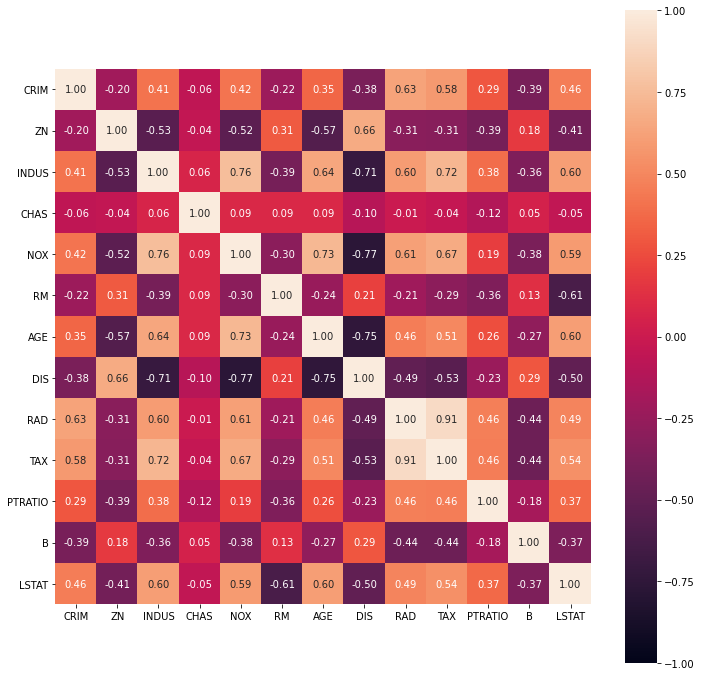

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, square=True, annot=True, fmt='.2f')
plt.show()

Aşağıda örnek iki değişken için scatter plot çizilmiştir.

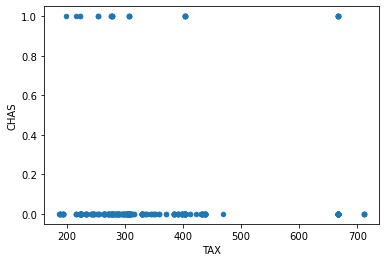

In [20]:
df.plot.scatter("TAX","CHAS")
plt.show()

Yukarıdaki heatmapten birbiri ile pozitif yüksek korelasyona sahip iki değişken için scatter plot çiziniz. Bir iki cümle ile görseli yorumlamaya çalışınız. Not:Yorum yaparken değişkenlerin yukarıdaki açıklamalarından faydalanabilirsiniz.

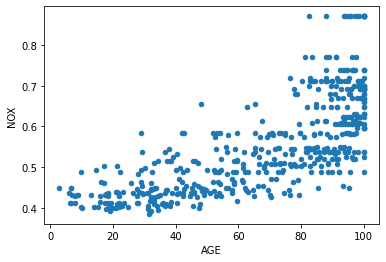

Pozitif korelasyonlu olan Nox (nitrojen oksit) hava kirliliğine doğrudan bir etkisi vardır. Bu değişkenin age özelliği ile ilişkisi ise eski binaların daha merkezi yerlerde olduğunu varsayıldığında buraların çok daha kalabalık ve egzoz dumanın daha çok salgılandığı yerler olması olasıdır.


In [21]:
df.plot.scatter("AGE","NOX")
plt.show()
print("Pozitif korelasyonlu olan Nox (nitrojen oksit) hava kirliliğine doğrudan bir etkisi vardır. Bu değişkenin age özelliği ile ilişkisi ise eski binaların daha merkezi yerlerde olduğunu varsayıldığında buraların çok daha kalabalık ve egzoz dumanın daha çok salgılandığı yerler olması olasıdır.")

Heatmapten faydalanarak negatif korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız

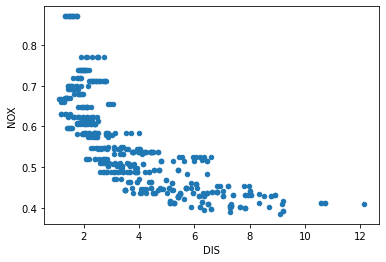

Hava kirliliği'ne etki eden NOX gazı şehir merkezine olan uzaklık ile negatif koralasyonludur. Merkeze yakın oldukça nox gazının konsantrasyonu artmaktadır.


In [22]:
df.plot.scatter("DIS","NOX")
plt.show()

print("Hava kirliliği'ne etki eden NOX gazı şehir merkezine olan uzaklık ile negatif koralasyonludur. Merkeze yakın oldukça nox gazının konsantrasyonu artmaktadır.")

Heatmapten faydalanarak düşük korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız.

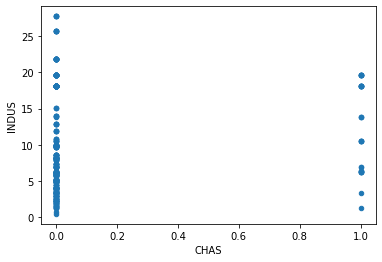

CHAS yolun nehrinin sınırında olup olmadığı, INDUS ise şehrin parekende satışı hakkında bilgi vermektedir ama bu iki değişken birbiri ile ilişkisizdir.


In [23]:
df.plot.scatter("CHAS","INDUS")
plt.show()
print("CHAS yolun nehrinin sınırında olup olmadığı, INDUS ise şehrin parekende satışı hakkında bilgi vermektedir ama bu iki değişken birbiri ile ilişkisizdir.")

### Soru

<b>Adım 1 :</b>df.cov() methodunu kullanarak datasetteki covariance değerlerini hesaplayın.<br> 
sns.heatmap ile bu methodu görselleştirin (IPUCU: Yukarıda korelasyon gösteriminde kullanılan yöntemin aynısı)
heatmap için vmin ve vmax parametrelerini kullanmayın.

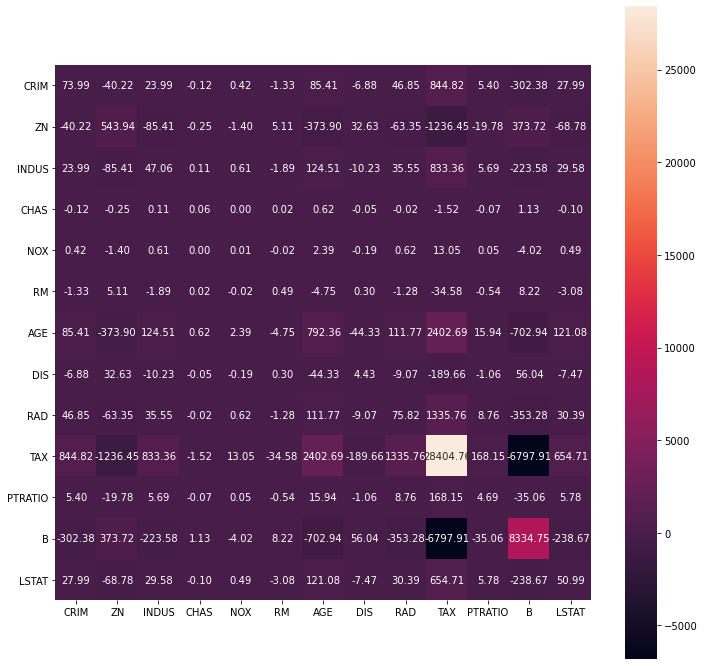

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(df.cov(), square=True, annot=True, fmt='.2f')
plt.show()

<b>Adım 2 :</b> Şimdi sklearn.preprocessing paketi içindeki StandardScaler objesini kullanarak datayı standardize edin ve bunu ayrı bir dataframede tutun. Standardize edilmiş dataframe objesinin Kovaryans değerini tekrar hesaplatıp görselleştirin.

<br>IPUCU : standardScalerdan gelen dönüştürülmüş datayı tekrar pandas DataFrame objesine çevirin ve bunu yaparken kolon adlarını kaybetmemeye çalışın örn: pd.DataFrame(standardize_numpy_datası, columns=df.columns)

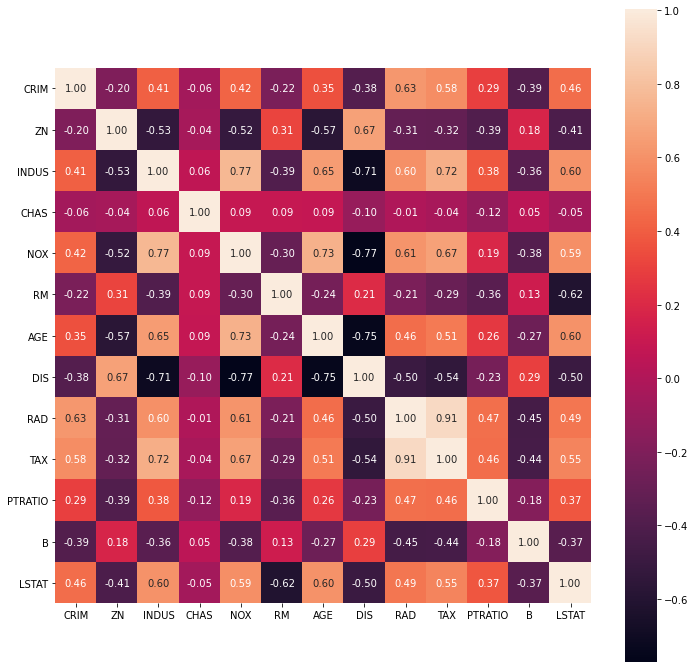

In [25]:
std = StandardScaler()
df_std=pd.DataFrame(std.fit_transform(df),columns=df.columns)

plt.figure(figsize=(12,12))
sns.heatmap(df_std.cov(), square=True, annot=True, fmt='.2f')
plt.show()
# Bilgi: Ortaya çıkan grafik korelasyon grafiğine benziyor mu? Evet :)